In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

data = {
    'Size': [600, 800, 1000, 1200, 1500, 1800, 2000, 2200, 2500, 2800],
    'Price': [150, 180, 200, 220, 260, 300, 320, 340, 370, 400]
}


In [31]:
# Convert dictionary to DataFrame
df=pd.DataFrame(data)

In [32]:
X=df[["Size"]]
y=df["Price"]

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
# Initialize KNN regressor with k=3 (3 nearest neighbors)
knn=KNeighborsRegressor(n_neighbors=3)
# Fit the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [53]:
y_pred=knn.predict(X_test)

In [54]:
# Predict house prices for test set
print("Predicted Prices : ",y_pred)
print("Actual Price : ",y_test.values)

Predicted Prices :  [370. 175.]
Actual Price :  [370 180]


In [55]:
# Calculate Mean Absolute Error (MAE)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error : ",mae)

Mean Absolute Error :  2.5


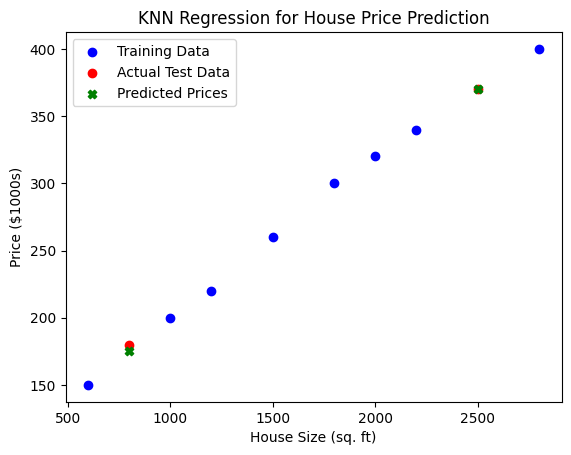

In [56]:
# Plot training data
plt.scatter(X_train,y_train,color='blue',label="Training Data")

# Plot test data
plt.scatter(X_test,y_test,color='red',label='Actual Test Data')

# Plot predicted data
plt.scatter(X_test,y_pred,color='green',label="Predicted Prices",marker="X")

plt.xlabel("House Size (sq. ft)")
plt.ylabel("Price ($1000s)")
plt.title("KNN Regression for House Price Prediction")
plt.legend()
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV
# Define range of k values to test
param_grid={'n_neighbors':np.arange(1,15)}

In [58]:
# Perform Grid Search with Cross-Validation
knn=KNeighborsRegressor()
grid_search=GridSearchCV(knn,param_grid,cv=5,scoring='neg_mean_absolute_error')
grid_search.fit(X_train,y_train)

C:\Users\Priti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Priti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Priti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Priti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_lab

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='neg_mean_absolute_error')

In [59]:
#Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

Best k: 2


In [61]:
# Train final model with best k
knn=KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=np.int64(2))

In [62]:
y_pred=knn.predict(X_test)

In [63]:
#Recalculate error
mae=mean_absolute_error(y_test,y_pred)
print("New Mean Absolute Error : ",mae)

New Mean Absolute Error :  2.5


In [72]:
from sklearn.preprocessing import StandardScaler
# Scale features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [73]:
# Train KNN with scaled data
knn=KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_scaled,y_train)
y_pred=knn.predict(X_test_scaled)

In [74]:
# Recalculate error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error after scaling:", mae)

Mean Absolute Error after scaling: 2.5


In [78]:
# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# Train final model
knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=np.int64(2), weights='distance')

In [80]:
# Predict
y_pred = knn.predict(X_test_scaled)

In [83]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
print("Final Optimized Mean Absolute Error:",mae)

Final Optimized Mean Absolute Error: 2.5
